In [14]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd

df = pd.read_csv("s3://ia-340-1038467/Crime_Reports.csv")

print("Shape:", df.shape)
print(df.info())
df.head()
print(df.describe(include="all"))

#MARKDOWN: I have around 2.6 million rows with 16 columns; most of which are numeric. Quite impressive that all this data has been condensed.

Shape: (2614910, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614910 entries, 0 to 2614909
Data columns (total 19 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Council District             float64
 12  APD Sector                   object 
 13  APD District                 object 
 14  Clearance Status             object 
 15  Clearance Date               object 
 16  UCR Category                 object 
 17  Category Description         object 
 18  Census Block Group   

In [7]:
df = df.rename(columns={"Highest Offense Description": "Offense_Description"})

df.isnull().sum()

df = df.dropna()

df.shape

#MARKDOWN: I renamed the Highest Offence Description column to Offence Description. In total, I had 4,503,493 missing values, and I used df.dropna() to erase them.

(681744, 19)

In [13]:
df = df.rename(columns={"Highest Offense Description": "Offense_Description"})

print(df["Offense_Description"].head())

print(df.sort_values(by="Occurred Date").head())

print(df.iloc[5:11])

print(df[df["Family Violence"] == "Y"].head())

#MARKDOWN: I filtered the Family Violence column as "Y" for Yes it did happen. Now my data has eben condensed even more resulting in easier display. As a result, the output shows only the crime activity that happened vs reported activity that did not.

3         DEADLY CONDUCT
53           AGG ASSAULT
64           AGG ASSAULT
117    THEFT FROM PERSON
126     THEFT OF BICYCLE
Name: Offense_Description, dtype: object
        Incident Number             Offense_Description  Highest Offense Code  \
3         2003920010048                  DEADLY CONDUCT                   408   
104127      20033091285  SEXUAL ASSAULT OF CHILD/OBJECT                  1707   
534       2003924598413                           THEFT                   600   
563       2003924799823                           THEFT                   600   
108495      20035023464           BURGLARY OF RESIDENCE                   500   

       Family Violence Occurred Date Time Occurred Date  Occurred Time  \
3                    N  01/01/2003  00:03    01/01/2003            3.0   
104127               Y  01/01/2003  18:46    01/01/2003         1846.0   
534                  N  01/01/2003  13:30    01/01/2003         1330.0   
563                  N  01/01/2003  00:30    01/01/

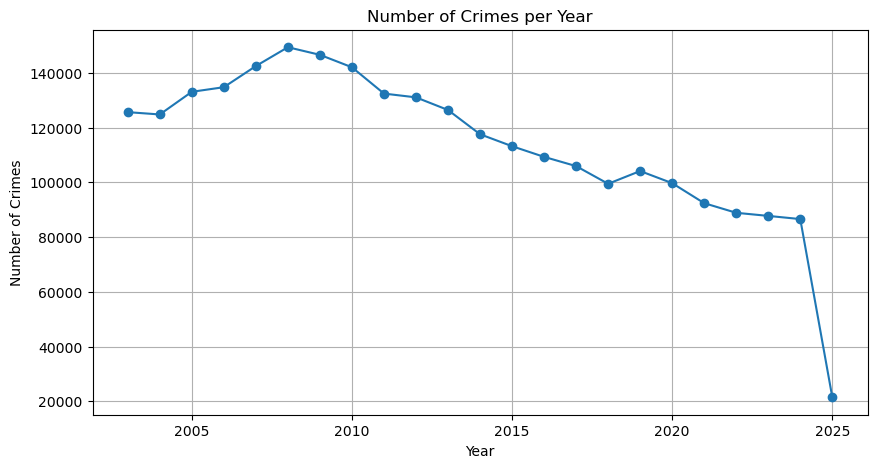

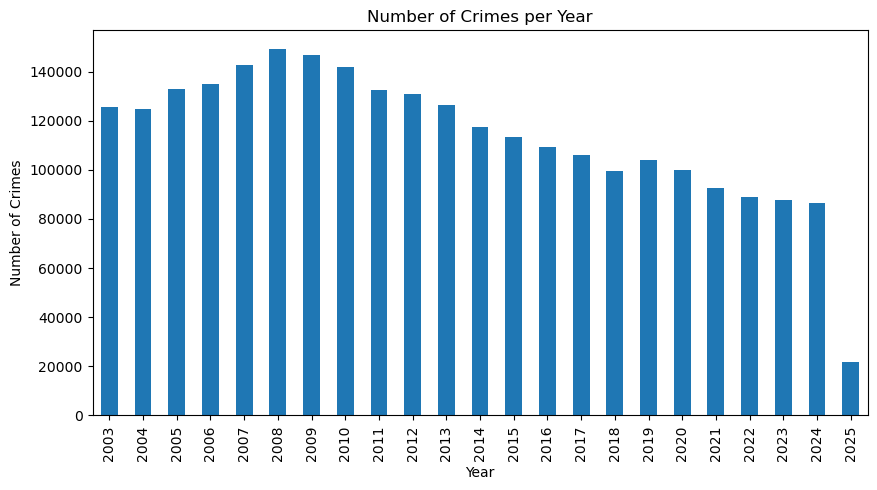

In [3]:
df = pd.read_csv("s3://ia-340-1038467/Crime_Reports.csv")

df["Occurred Date"] = pd.to_datetime(df["Occurred Date"], errors="coerce")

crimes_per_year = df.groupby(df["Occurred Date"].dt.year)["Incident Number"].count()

#Visualization One: Line Chart
plt.figure(figsize=(10,5))
crimes_per_year.plot(kind="line", marker="o")
plt.title("Number of Crimes per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.show()
#MARKDOWN: The line chart was created to show trends in the total datas per year. There is a steady decrease in crime since its peak in 2008.

#Visualization Two: Bar Chart
plt.figure(figsize=(10,5))
crimes_per_year.plot(kind="bar")
plt.title("Number of Crimes per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.show()
#MARKDOWN: The bar chart was created to show the numerical totals of each year's crime reports. As with the line graph, the crime reports seem to decrease since the year 2008.